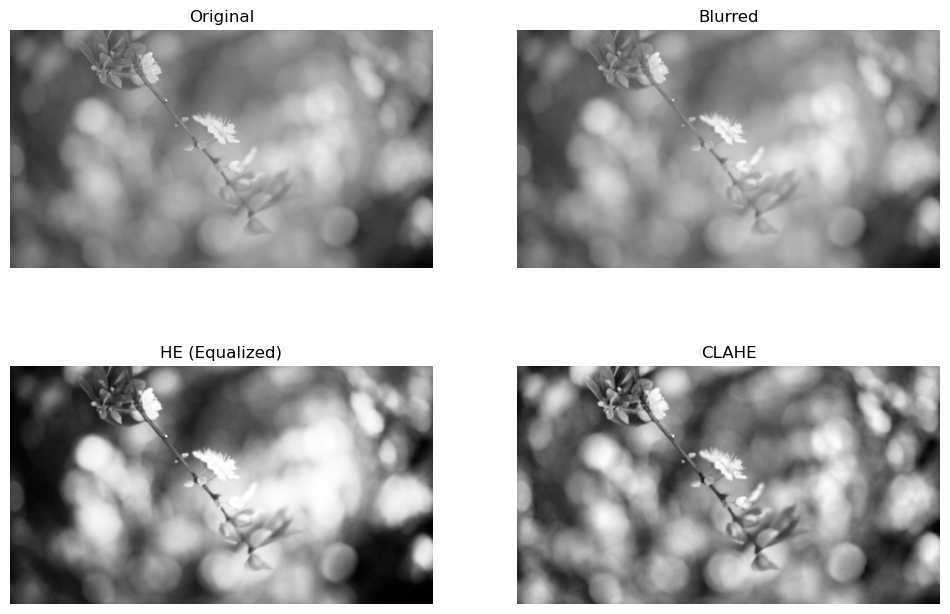

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 1. 이미지 불러오기 (그레이스케일)
img = cv2.imread("blury_image.jpg", cv2.IMREAD_GRAYSCALE)

# 2. 블러 처리 (Gaussian Blur)
blurred = cv2.GaussianBlur(img, (7, 7), 0)

# 3. 히스토그램 평활화 (HE)
he = cv2.equalizeHist(blurred)
# he = cv2.equalizeHist(img)

# 4. CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(blurred)
# clahe_img = clahe.apply(img)

# 5. 결과 시각화
titles = ['Original', 'Blurred', 'HE (Equalized)', 'CLAHE']
images = [img, blurred, he, clahe_img]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

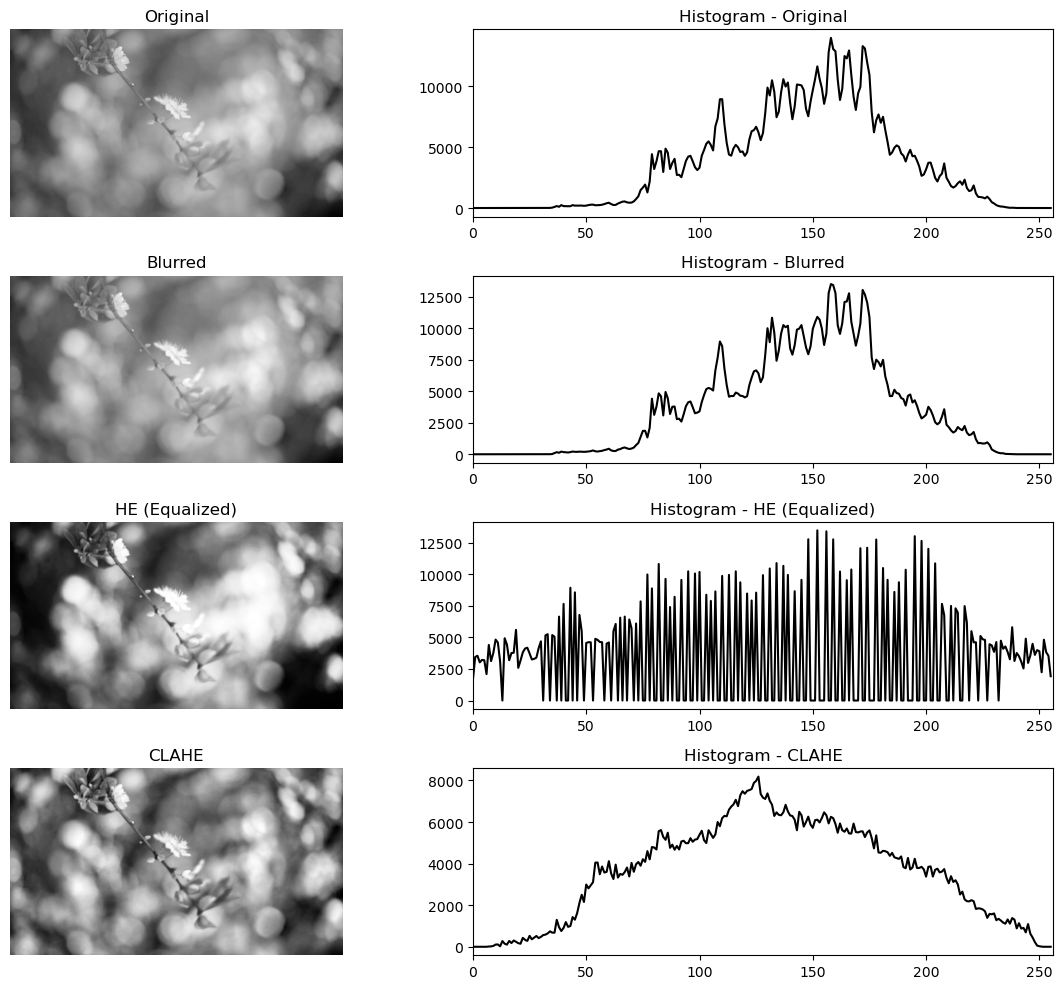

In [3]:
plt.figure(figsize=(12, 10))

for i in range(4):
    # 이미지
    plt.subplot(4, 2, 2*i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

    # 히스토그램
    plt.subplot(4, 2, 2*i+2)
    hist = cv2.calcHist([images[i]], [0], None, [256], [0, 256])
    plt.plot(hist, color='black')
    plt.xlim([0, 256])
    plt.title(f'Histogram - {titles[i]}')

plt.tight_layout()
plt.show()